In [273]:
# Import required libraries
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [274]:
# Load the image and RNA expression data
images = [image for image in os.listdir('data')]

In [275]:
# Load the image and RNA expression data
expression_data = pd.read_csv('df_train.csv')
# expression_data['path'] = 'data/' + expression_data['path']
expression_data['path'] = 'data_jpeg/' + expression_data['path']
for i in range(len(expression_data)):
    #replace .tif with .jpg in the path column
    expression_data['path'][i] = expression_data['path'][i].replace('.tif', '.jpeg')
expression_data.head()

C:\Users\sathy\AppData\Local\Temp\ipykernel_11668\136550899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data['path'][i] = expression_data['path'][i].replace('.tif', '.jpeg')


,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,72.668964,86.982548,71.567919,102.397177,56.153291,data_jpeg/CoreID101.jpeg
1,84.038087,65.603926,85.122450,101.387886,100.845705,50.422852,data_jpeg/CoreID102.jpeg
2,82.927907,70.431921,100.535887,130.071854,89.175900,52.823941,data_jpeg/CoreID105.jpeg
3,93.960336,72.446053,92.204068,66.299116,74.202321,39.076962,data_jpeg/CoreID107.jpeg
4,113.968536,73.458393,94.793735,49.152307,54.013524,28.627168,data_jpeg/CoreID108.jpeg


In [276]:
# Separate the gene expression values from the other columns
expression_values = expression_data.iloc[:, 1:-1]

# Get the minimum and maximum values for each gene
min_values = expression_values.min(axis=0)
max_values = expression_values.max(axis=0)

# Shift the expression values so the minimum is zero
expression_values = expression_values - min_values

# Normalize each gene's expression values using Min-Max normalization
normalized_expression_values = expression_values / max_values

# Add the normalized values back to the original dataframe
expression_data.iloc[:, 1:-1] = normalized_expression_values

# Get the log of the normalized expression values
log_normalized_expression_values = np.log(normalized_expression_values + 1)

# Add the log transformed values back to the original dataframe
expression_data.iloc[:, 1:-1] = log_normalized_expression_values

expression_data.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,0.219365,0.190308,0.078472,0.379011,0.415963,data_jpeg/CoreID101.jpeg
1,84.038087,0.168273,0.182066,0.132042,0.371800,0.361014,data_jpeg/CoreID102.jpeg
2,82.927907,0.203468,0.248397,0.180998,0.315834,0.384407,data_jpeg/CoreID105.jpeg
3,93.960336,0.217792,0.213089,0.068701,0.239105,0.242411,data_jpeg/CoreID107.jpeg
4,113.968536,0.224915,0.224197,0.036225,0.125348,0.119137,data_jpeg/CoreID108.jpeg


In [277]:
# Define the CNN model
input_img = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)

In [278]:
# Define the FCN model
y = Dense(256, activation='relu')(x)
y = Dense(128, activation='relu')(y)
output = Dense(6, activation='linear')(y)

In [279]:
# Combine the CNN and FCN into a single model
model = Model(input_img, output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [280]:
import cv2
import numpy as np

def grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = np.expand_dims(image, axis=-1)
    return np.repeat(image, 3, axis=-1)


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=grayscale
)

In [281]:
for image in os.listdir('data_jpeg/'):
    print(image)
    im = cv2.imread('data_jpeg/' + image)
    im = grayscale(im)
    cv2.imwrite('data_jpeg/' + image, im)

CoreID101.jpeg
CoreID102.jpeg
CoreID105.jpeg
CoreID107.jpeg
CoreID108.jpeg
CoreID111.jpeg
CoreID114.jpeg
CoreID119.jpeg
CoreID12.jpeg
CoreID120.jpeg
CoreID122.jpeg
CoreID123.jpeg
CoreID124.jpeg
CoreID125.jpeg
CoreID126.jpeg
CoreID127.jpeg
CoreID128.jpeg
CoreID129.jpeg
CoreID13.jpeg
CoreID130.jpeg
CoreID131.jpeg
CoreID132.jpeg
CoreID133.jpeg
CoreID135.jpeg
CoreID138.jpeg
CoreID140.jpeg
CoreID141.jpeg
CoreID142.jpeg
CoreID143.jpeg
CoreID144.jpeg
CoreID145.jpeg
CoreID146.jpeg
CoreID15.jpeg
CoreID150.jpeg
CoreID16.jpeg
CoreID2.jpeg
CoreID21.jpeg
CoreID22.jpeg
CoreID23.jpeg
CoreID24.jpeg
CoreID25.jpeg
CoreID26.jpeg
CoreID28.jpeg
CoreID29.jpeg
CoreID3.jpeg
CoreID30.jpeg
CoreID33.jpeg
CoreID34.jpeg
CoreID35.jpeg
CoreID37.jpeg
CoreID38.jpeg
CoreID39.jpeg
CoreID4.jpeg
CoreID41.jpeg
CoreID42.jpeg
CoreID44.jpeg
CoreID46.jpeg
CoreID47.jpeg
CoreID48.jpeg
CoreID49.jpeg
CoreID50.jpeg
CoreID51.jpeg
CoreID52.jpeg
CoreID53.jpeg
CoreID54.jpeg
CoreID55.jpeg
CoreID58.jpeg
CoreID59.jpeg
CoreID6.jpeg
CoreID6

In [282]:
from PIL import Image
import os

def convert_tif_to_jpeg(src_dir, dst_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Loop through all TIFF files in the source directory
    for filename in os.listdir(src_dir):
        if filename.endswith(".tif"):
            # Open the TIFF image
            tif_image = Image.open(os.path.join(src_dir, filename))

            # Save the TIFF image as a JPEG image
            jpeg_filename = os.path.splitext(filename)[0] + ".jpeg"
            tif_image.save(os.path.join(dst_dir, jpeg_filename), "JPEG")

# Example usage:
src_dir = "data/"
dst_dir = "data_jpeg/"
convert_tif_to_jpeg(src_dir, dst_dir)

In [283]:
# split the data into train and validation sets
train_df, val_df = train_test_split(expression_data, test_size=0.3, random_state=100)
#make test split
val_df, test_df = train_test_split(val_df, test_size=0.3, random_state=100)
print(model.metrics_names)

[]


In [284]:
# create the generators
train_gen = datagen.flow_from_dataframe(train_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=4)
val_gen = datagen.flow_from_dataframe(val_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=4)

Found 69 validated image filenames.
Found 21 validated image filenames.


In [285]:
history = model.fit_generator(train_gen, epochs=100, validation_data=val_gen)

Epoch 1/100


C:\Users\sathy\AppData\Local\Temp\ipykernel_11668\2546567252.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=100, validation_data=val_gen)


18/18 [==============================] - 1s 61ms/step - loss: 418.6549 - accuracy: 0.9420 - val_loss: 121.2785 - val_accuracy: 1.0000
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 138.3342 - accuracy: 1.0000 - val_loss: 91.9029 - val_accuracy: 1.0000
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 142.4553 - accuracy: 1.0000 - val_loss: 141.9192 - val_accuracy: 1.0000
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 151.9467 - accuracy: 1.0000 - val_loss: 102.8213 - val_accuracy: 1.0000
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 115.3375 - accuracy: 1.0000 - val_loss: 79.8646 - val_accuracy: 1.0000
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 123.8237 - accuracy: 1.0000 - val_loss: 74.7285 - val_accuracy: 1.0000
Epoch 7/100
18/18 [==============================] - 1s 33ms/step - loss: 124.1397 - accuracy: 1.0000 - val_loss: 97.7880 - val_accuracy: 1

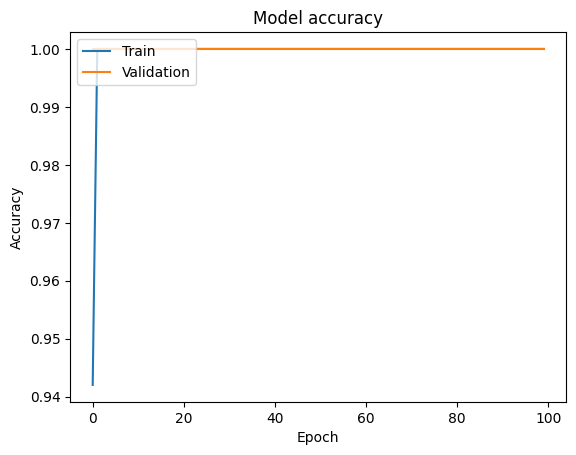

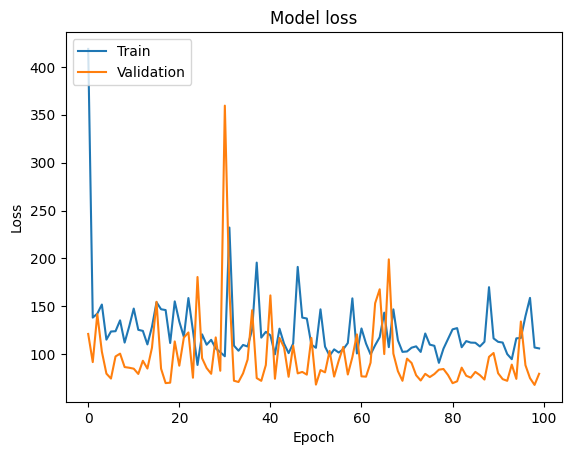

In [286]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [287]:
from keras.models import load_model
model.save('best_model.h5')
model = load_model('best_model.h5')

In [288]:
#run the model on the test data
test_df

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
68,93.588818,0.339882,0.106742,0.063115,0.209994,0.405637,data_jpeg/CoreID6.jpeg
6,92.959069,0.306382,0.212928,0.043256,0.246147,0.209731,data_jpeg/CoreID114.jpeg
43,115.432128,0.178215,0.162658,0.082723,0.077428,0.218388,data_jpeg/CoreID29.jpeg
26,100.910766,0.143180,0.156459,0.123661,0.255434,0.343546,data_jpeg/CoreID141.jpeg
76,64.528452,0.177659,0.130911,0.074132,0.569942,0.372773,data_jpeg/CoreID68.jpeg
77,62.306189,0.137076,0.103786,0.076917,0.490968,0.386528,data_jpeg/CoreID69.jpeg
3,93.960336,0.217792,0.213089,0.068701,0.239105,0.242411,data_jpeg/CoreID107.jpeg
35,81.791908,0.408726,0.070241,0.142420,0.252214,0.507746,data_jpeg/CoreID2.jpeg
51,92.441896,0.232539,0.174803,0.094846,0.360356,0.057367,data_jpeg/CoreID39.jpeg


In [289]:
test_df['path'] = test_df['path']
test_gen = datagen.flow_from_dataframe(test_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=1)

Found 9 validated image filenames.


In [290]:
#calculate r^2
from sklearn.metrics import r2_score
import numpy as np
r2 = []
y_arr = []
pred_arr = []
for i in range(0, len(test_df)):
    x, y = test_gen.next()
    y_arr.append(y)
    pred_arr.append(model.predict(x)[0])
    r2.append(r2_score(y[0], model.predict(x)[0]))
print('mean r2 = {}'.format(np.mean(r2)))

1/1 [==============================] - 0s 16ms/step
mean r2 = 0.9661524307287274


In [291]:
ind = 0
gt_array = []
pred_1_arr = []
diff_arr = []
for i in range(0, len(test_df)):
    x, y = test_gen.next()
    gt = y[0][3]
    pred1 = model.predict(x)[0][3]
    gt_array.append(gt)
    pred_1_arr.append(pred1)
    diff_arr.append(gt - pred1)

1/1 [==============================] - 0s 16ms/step


In [292]:
r2_score_1 = r2_score(gt_array, pred_1_arr)
print("ground truth: {} \npredicted: {} \nr2: {} \ndiff: {}".format(gt_array, pred_1_arr, r2_score_1, diff_arr))

ground truth: [0.07691657791831781, 0.0827230642988534, 0.12366141568574936, 0.07413186901487039, 0.06311482370276042, 0.04325596051210809, 0.09484625031328528, 0.06870068740890493, 0.1424203400417687] 
predicted: [0.071213424, -0.15392548, -0.012372319, 0.086432874, 0.06786865, -0.12105733, 0.018214878, -0.15955311, 0.12778252] 
r2: -20.14496913886252 
diff: [0.005703153712537781, 0.23664854275725794, 0.1360337343410018, -0.012301005187857886, -0.004753826256803789, 0.16431329207415032, 0.07663137261844008, 0.22825379800842277, 0.014637816409719145]


<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[ 8.3364510e+01  2.0398954e-01 -2.6136419e-02  6.9697559e-02
 -1.6932909e-01  2.4386500e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[ 8.5479034e+01  1.5177849e-01 -1.2815733e-02 -3.0950848e-02
 -1.4840548e-01  3.2124400e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[ 8.2113930e+01  2.0182541e-01 -2.4839422e-02  1.3829345e-01
 -1.8698828e-01  2.0287918e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[ 8.0159073e+01  1.9880441e-01 -3.7327547e-02  2.6749548e-02
 -1.5191405e-01  2.7434504e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 31ms/step
[ 8.8802505e+01  1.1566999e-01  2.558033

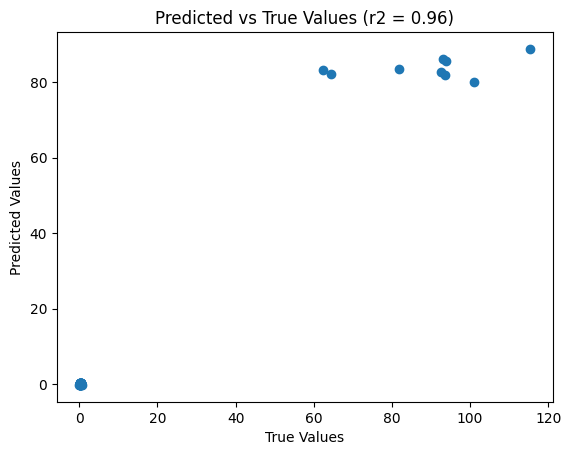

In [293]:
import matplotlib.pyplot as plt

# Calculate the mean r2 score
r2 = []
y_arr = []
pred_arr = []
for i in range(0, len(test_df)):
    x, y = test_gen.next()
    print(type(x))
    y_arr.append(y[0])
    pred_arr.append(model.predict(x)[0])
    print(model.predict(x)[0])
    r2.append(r2_score(y[0], model.predict(x)[0]))
mean_r2 = np.mean(r2)

# Plot the points
plt.scatter(y_arr, pred_arr)

# Add a title and labels to the plot
plt.title('Predicted vs True Values (r2 = {:.2f})'.format(mean_r2))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

In [294]:
# run inference on random picture
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import os
import pandas as pd
import cv2

In [295]:
image_path = '../data/webscraped_labeled/primary0.jpg'

In [296]:
# Load the image
image = cv2.imread(image_path)

# Resize the image to the expected size
expected_size = (128, 128
                 )
image = cv2.resize(image, expected_size)

# Preprocess the image
preprocessed_image = image / 255.

# Add an extra dimension to represent the batch size
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Run the image through the model
prediction = model.predict(preprocessed_image)
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[ 7.4046463e+01  1.5276578e-01 -2.4773857e-02  7.1525514e-02
  -1.4497130e-01  2.2121547e-01]]
